In [4]:
import numpy as np
import matplotlib.pylab as plt
from scipy import interpolate
from matplotlib.ticker import AutoMinorLocator
% matplotlib notebook

<IPython.core.display.Javascript object>


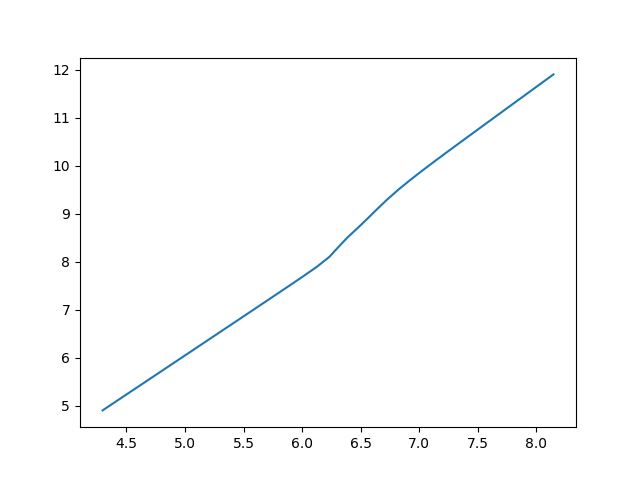

In [5]:
data = np.loadtxt('data/tite.dat',skiprows=3)
plt.figure(1)
plt.plot(data[:,1],data[:,0])

In [6]:
T = 67.7 # KS
T = 131.9 # XTE
T = 85
k_b = 8.617330350e-5
T /= k_b
T /= 0.8183 
print(T)
T_b = np.interp(np.log10(T),data[:,1],data[:,0])
print(0.8183*np.power(10,T_b))
print(0.8183*np.power(10,T_b)/1e8)

1205406.7868396693
53563375.5556
0.535633755556


<IPython.core.display.Javascript object>


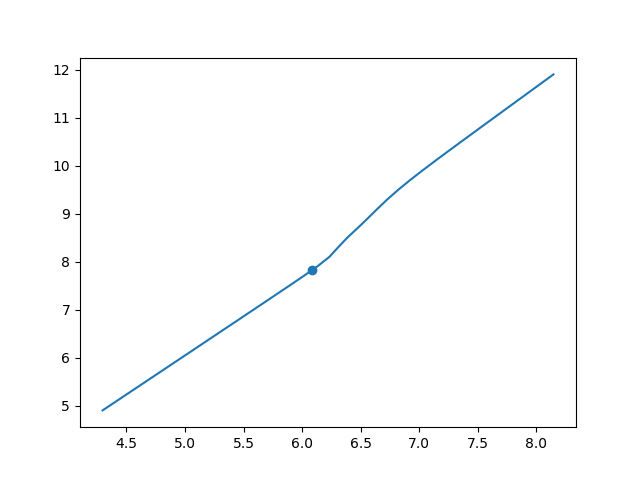

In [7]:
plt.figure(2)
plt.plot(data[:,1],data[:,0])
plt.scatter(np.log10(T),T_b)

In [8]:
MSun = 1.98892e33
LSun = 3.846e33
c = 2.99792458e10
G = 6.67259e-8
from_ev_to_erg = 1.6021766208e-12
from_yr_to_sec = 31536000

In [9]:
L = 6e37
M = L/0.1/MSun*from_yr_to_sec/c/c
print(M)

1.0585201667550303e-08


In [10]:
M = 0.2 #[g/s]
M /= MSun
M *= 1e18
M *= from_yr_to_sec

print(M)
print(M/2)

3.1711682722281444e-09
1.5855841361140722e-09


In [11]:
11*7/365

0.21095890410958903

In [12]:
rho = 2
i = 0
Pow=4
dt=0
timeshift=4e4
num = dt + 8*Pow + 2*rho
print(num)
data = np.loadtxt('output_hm/cooling_SF0_' + str(num) + '.dat')
data2 = np.loadtxt('output_lm/cooling_SF0_' + str(num) + '.dat')

#1e12         1e+11          500 1e0
#1.230001e+13 1e+12          500 1e0

36


<IPython.core.display.Javascript object>


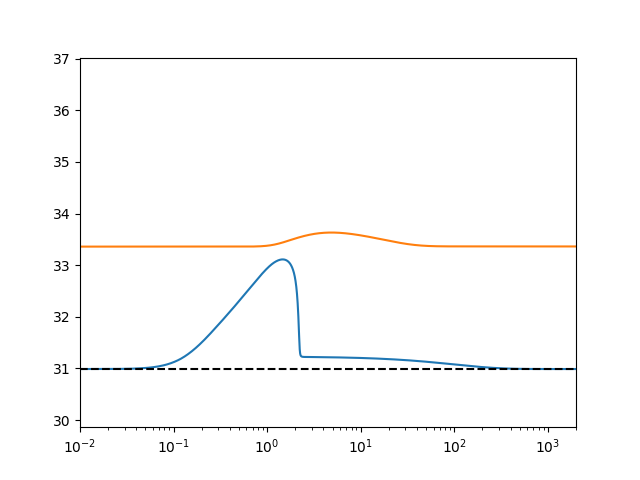

(0.01, 2000)

In [13]:
plt.figure(3)
plt.plot(data[:,1]-timeshift, np.log10(data[:,-2]))
plt.plot(data2[:,1]-timeshift, np.log10(data2[:,-2]))
plt.axhline(y=30.9875,ls='--',color='black')
plt.xscale('log')
plt.xlim(0.01,2000)

<IPython.core.display.Javascript object>


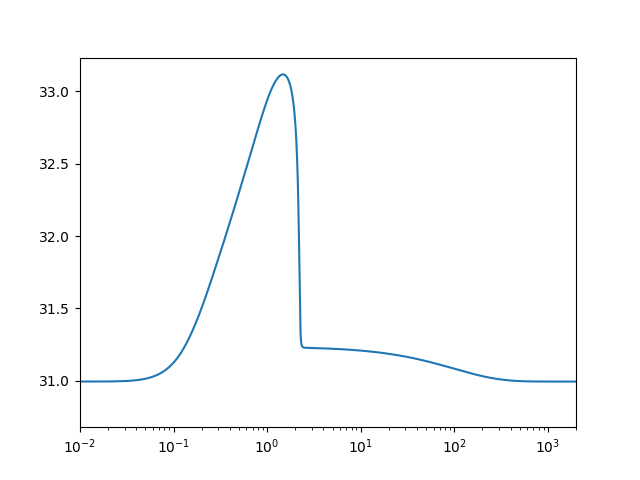

(0.01, 2000)

In [2]:
data3 = np.loadtxt('output/cooling_SF0_' + str(42) + '.dat')
plt.figure(4)
plt.plot(data3[:,1]-3e4, np.log10(data3[:,-2]))
#plt.axhline(y=30.9875,ls='--',color='black')
plt.xscale('log')
plt.xlim(0.01,2000)
#plt.ylim(30,34)

In [14]:
temperature3 = np.loadtxt('output/temperature_SF0_' + str(42) + '.dat')
turn_on_time = 0.0
t_points_save_data  = np.array([1e-2, turn_on_time + 0.01, turn_on_time + 0.1, turn_on_time + 0.5, turn_on_time + 1., turn_on_time + 1.5,
                                       turn_on_time + 2.,   turn_on_time + 2.5,  turn_on_time + 3,  turn_on_time + 3.5, turn_on_time + 4., turn_on_time + 4.5, turn_on_time + 5,
                                       turn_on_time + 10, turn_on_time + 20, turn_on_time + 30, turn_on_time + 40, turn_on_time + 50, turn_on_time + 100, turn_on_time + 200, turn_on_time + 300, 
                                       turn_on_time + 400, turn_on_time + 500, turn_on_time + 1000, turn_on_time + 2000, turn_on_time + 3000, turn_on_time + 4000])


In [18]:
def plot_style(xticks=5,yticks=5):
    
    global ax
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 10


    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6

<IPython.core.display.Javascript object>


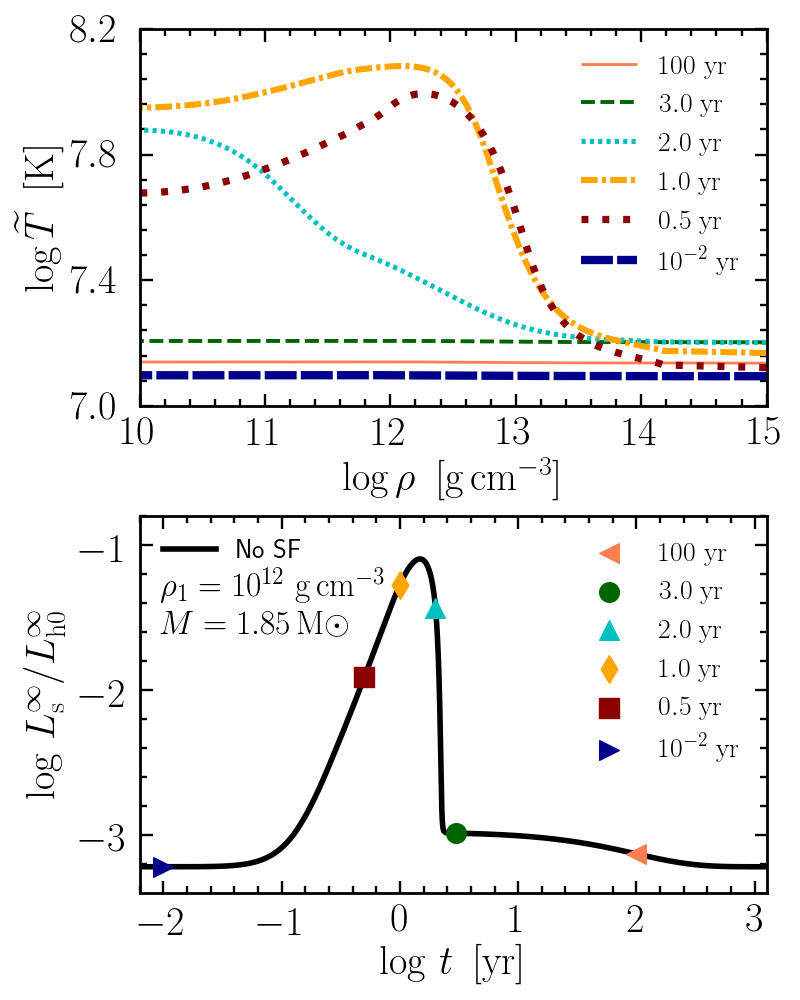

In [30]:
plot_style()
ax = plt.subplot(2,1,1)
plt.yticks(np.array([7,7.4,7.8,8.2,8.6,9]),fontsize=29)
plt.xticks(np.array([9,10,11,12,13,14,15]),fontsize=29)
plt.ylim(7.0,8.2)
plt.xlim(10,15)

x_minor_locator = AutoMinorLocator(5)
y_minor_locator = AutoMinorLocator(5)
x_minor_locator2 = AutoMinorLocator(5)
y_minor_locator2 = AutoMinorLocator(5)

plt.tick_params(which='both', width=1.7)
plt.tick_params(which='major', length=9)
plt.tick_params(which='minor', length=5)
ax.xaxis.set_minor_locator(x_minor_locator)
ax.yaxis.set_minor_locator(y_minor_locator)
ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')
ax.tick_params(axis='y', which='both', pad=16)

ax2 = plt.subplot(2,1,2)
x_minor_locator = AutoMinorLocator(5)
y_minor_locator = AutoMinorLocator(5)
plt.tick_params(which='both', width=1.7)
plt.tick_params(which='major', length=9)
plt.tick_params(which='minor', length=5)
ax2.xaxis.set_minor_locator(x_minor_locator2)
ax2.yaxis.set_minor_locator(y_minor_locator2)
ax2.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')


plt.yticks(np.array([-3,-2,-1]),fontsize=29)
plt.xticks(np.array([-2,-1,0,1,2,3,4]),fontsize=29)
plt.xlim(-2.2,3.1)
plt.ylim(-3.4,-0.8)

ax2.axhline(y=30.9875,ls='--',lw=2,color='black',zorder=2)


ax2.set_ylabel('$\\rm log $ $L^{\infty}_{\\rm{s}}/L_{\\rm{h0}}^{\infty}$', fontsize=29)
ax2.set_xlabel('$\\rm log$ $t \\thinspace \\thinspace \\thinspace \\rm [yr]$', fontsize=29)

ax.set_xlabel('$\\rm log \\thinspace$$\\rho \\thinspace \\thinspace \\thinspace \\rm [g \\thinspace cm^{-3}]$',fontsize=29)
ax.set_ylabel('$\\rm log \\thinspace$$ \\widetilde{T} \\thinspace \\thinspace \\thinspace \\rm [K]$',fontsize=29)

tryr=data3[:,1]-3e4

f_interp = interpolate.interp1d(data3[:,1]-3e4,np.log10(data3[:,-2]))

dashes = np.array([[12,1e-15,12,1e-15],[10,4,10,4],[3,3,3,3], [12,3,3,3], [5,10,5,10],[23,3,23,3]])
line_thickness = np.linspace(2,6,6)
cl = ['coral','darkgreen','c','orange','darkred','darkblue']
markers = ['<','o','^','d','s','>']
labels = np.array(['$\\rm 10^{-2}$ $\\rm yr$' ,'$\\rm 0.5$ $\\rm yr$','$\\rm 1.0$ $\\rm yr$','$\\rm 2.0$ $\\rm yr$','$\\rm 3.0$ $\\rm yr$','$\\rm 100$ $\\rm yr$'])[::-1]

for i,idx in zip([1,4,5,7,9,19][::-1],range(7)):
    ax.plot(np.log10(temperature3[:,0]),np.log10(temperature3[:,i]),label=labels[idx],
            lw=line_thickness[idx],color=cl[idx],dashes=[dashes[idx][0], dashes[idx][1],dashes[idx][2], dashes[idx][3]])
    ax2.scatter(np.log10(t_points_save_data[i-1]),f_interp(t_points_save_data[i-1])-np.log10(1.6425961781e+34),marker=markers[idx],color=cl[idx],zorder=3,s=200,label=labels[idx])

ax.legend(loc='upper right',fontsize=20,frameon=False)
first_legend = ax2.legend(loc='upper right',fontsize=20,frameon=False)

line, = ax2.plot(np.log10(tryr[np.where(tryr>0)]), np.log10(data3[:,-2][np.where(tryr>0)]/1.6425961781e+34),zorder=1,lw=4,color='k',label='No SF')
plt.legend(handles=[line],loc='upper left',fontsize=19,scatterpoints=1,frameon=False)
plt.gca().add_artist(first_legend)
    
ax2.text(-2.03,-1.39,'$\\rho_{1} = 10^{12} \\thinspace \\thinspace \\rm g \\thinspace cm^{-3}$', fontsize=24)
ax2.text(-2.03,-1.62,'$M = 1.85 \\thinspace \\rm M \\odot$',fontsize=24)

plt.savefig('for_fig3_examination.eps',format='eps')
plt.savefig('for_fig3_examination.jpg',format='jpg')

<IPython.core.display.Javascript object>


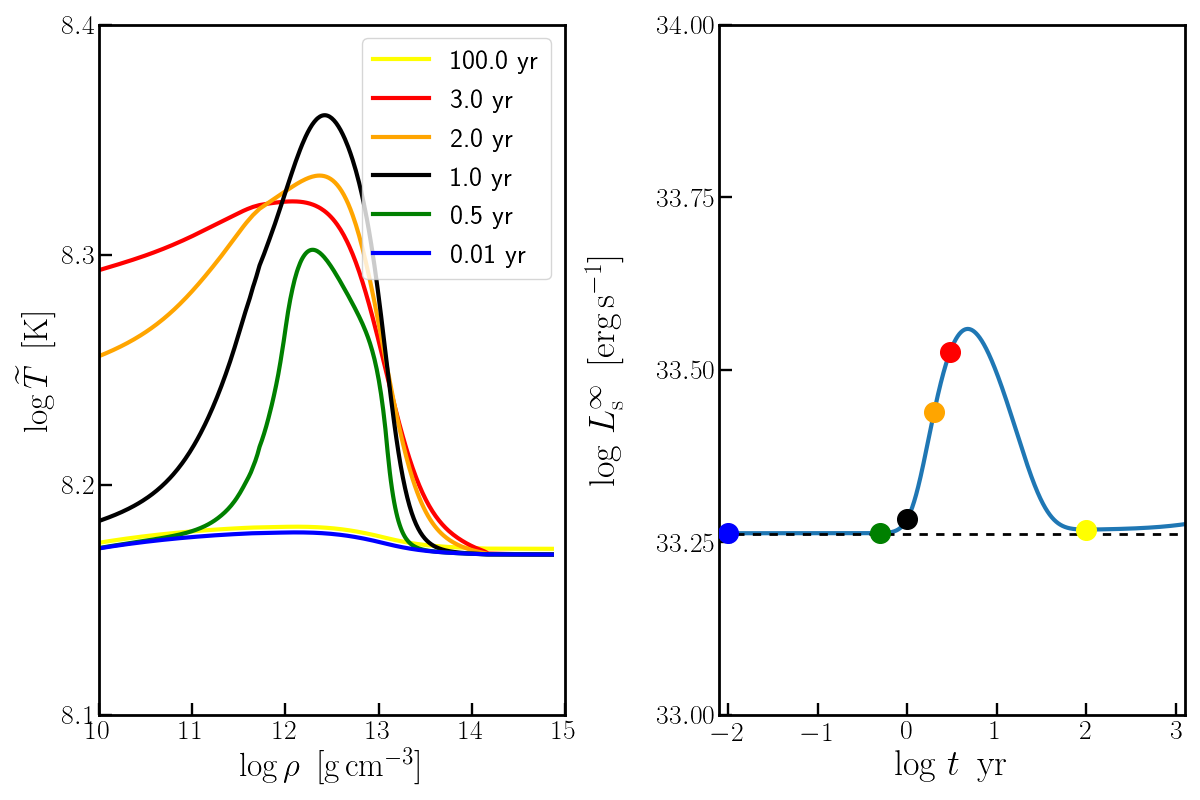

In [22]:
plot_style()
temperature3 = np.loadtxt('output/temperature_SF0_' + str(44) + '.dat')
data3 = np.loadtxt('output/cooling_SF0_' + str(44) + '.dat')
ax = plt.subplot(1,2,1)
plt.yticks(np.array([7,7.2,7.4,7.6,7.8,8,8.1,8.2,8.3,8.4,8.6,8.8,9]),fontsize=20)
plt.xticks(np.array([9,10,11,12,13,14,15]),fontsize=20)
plt.ylim(8.1,8.4)
plt.xlim(10,15)

ax2 = plt.subplot(1,2,2)
plt.yticks(np.array([30,30.5,31,31.5,32,32.5,33,33.25,33.5,33.75,34,34.5,35]),fontsize=20)
plt.xticks(np.array([-2,-1,0,1,2,3,4]),fontsize=20)
plt.xlim(-2.1,3.1)
plt.ylim(33,34)

ax2.axhline(y=33.262,ls='--',lw=2,color='black',zorder=2)


ax2.tick_params(which='both', width=1.7)
ax2.tick_params(which='major', length=9)
ax2.tick_params(which='minor', length=5)

ax.tick_params(which='both', width=1.7)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5)
ax2.set_ylabel('$\\rm log $ $L^{\infty}_{\\rm{s}} \\thinspace \\thinspace \\thinspace \\rm [erg \\thinspace s^{-1}]$', fontsize=26, labelpad=18)
ax2.set_xlabel('$\\rm log$ $t \\thinspace \\thinspace \\thinspace \\rm{yr}$', fontsize=26)
ax.set_xlabel('$\\rm log \\thinspace$$\\rho \\thinspace \\thinspace \\thinspace \\rm [g \\thinspace cm^{-3}]$',fontsize=24)
ax.set_ylabel('$\\rm log \\thinspace$$ \\widetilde{T} \\thinspace \\thinspace \\thinspace \\rm [K]$',fontsize=24)

tryr=data3[:,1]-3e4
ax2.plot(np.log10(tryr[np.where(tryr>0)]), np.log10(data3[:,-2][np.where(tryr>0)]),zorder=1,lw=3)
f_interp = interpolate.interp1d(data3[:,1]-3e4,np.log10(data3[:,-2]))
for i,color in zip([1,4,5,7,9,19][::-1],['yellow','red','orange','black','green','blue']):
    ax.plot(np.log10(temperature3[:,0]),np.log10(temperature3[:,i]),label=str(t_points_save_data[i-1]) + ' yr',lw=3,color=color)
    ax2.scatter(np.log10(t_points_save_data[i-1]),f_interp(t_points_save_data[i-1]),color=color,zorder=3,s=200)

ax.legend(loc='upper right',fontsize=20)
plt.savefig('for_fig3_examination_1.40M.pdf',format='pdf')